In [1]:
# wOBA
def woba(batting_mlb):
    Batters = batting_mlb;
    ABH     = np.array(Batters['AB'])+np.array(Batters['BB'])-np.array(Batters['IBB'])+np.array(Batters['SF'])+np.array(Batters['HBP'])
    hBH     = (.69*(np.array(Batters['BB'])-np.array(Batters['IBB'])))+.72*np.array(Batters['HBP'])+.88*(np.array(Batters['H'])-np.array(Batters['2B'])-np.array(Batters['3B'])-np.array(Batters['HR']))+1.247*np.array(Batters['2B'])+1.578*np.array(Batters['3B'])+2.301*np.array(Batters['HR'])
    woba      = np.nan_to_num(hBH/ABH)
    return woba

In [2]:
# SLG = TB/AB
def slg(batting_mlb):
    Batters = batting_mlb;
    TB      = np.array(Batters['H'])+np.array(Batters['2B'])+2*np.array(Batters['3B'])+3*np.array(Batters['HR'])
    tb      = TB/np.array(Batters['AB'])
    return tb

In [3]:
# OBP = H+BB+HBP/AB+BB+SF+HBP
def obp(batting_mlb):
    Batters = batting_mlb;
    obp = (np.array(Batters['H'])+np.array(Batters['HBP'])+np.array(Batters['BB']))/(np.array(Batters['AB'])+np.array(Batters['BB'])+np.array(Batters['SF'])+np.array(Batters['HBP']))
    return obp

In [4]:
# Runs Created
def runs_created(batting_mlb):
    Batters = batting_mlb;
    ABH     = np.array(Batters['AB'])+np.array(Batters['BB'])+np.array(Batters['HBP'])
    hBH     = np.array(Batters['BB'])+np.array(Batters['HBP'])+np.array(Batters['H'])
    TB      = np.array(Batters['H'])+np.array(Batters['2B'])+2*np.array(Batters['3B'])+3*np.array(Batters['HR'])
    RC      = (np.nan_to_num(hBH.T*TB/ABH))
    return RC

In [5]:
# AVG
def avg(batting_mlb):
    Batters = batting_mlb;
    H = np.array(Batters['H']);
    AB = np.array(Batters['AB']);
    AVG = H/AB;
    return AVG

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [7]:
batting_data = pd.read_csv('cud_.csv').drop_duplicates(subset=['playerID','yearID'])
batting_data = batting_data.drop(['Unnamed: 0','playerID','teamID','lgID','salary_rank','yearID'],axis=1)

In [8]:
batting_data['woba']=woba(batting_data)
batting_data['slg']=slg(batting_data)
batting_data['obp']=obp(batting_data)
batting_data['rc']=runs_created(batting_data)
batting_data['avg']=avg(batting_data)

In [9]:
batting_data.head()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,...,SH,SF,GIDP,salary,age,woba,slg,obp,rc,avg
0,1,77,195,18,42,9,0,7,22,3,...,2,0,4,220000,19,0.292594,0.369231,0.278302,20.037736,0.215385
1,2,229,733,102,190,36,5,22,89,21,...,6,5,8,1000000,20,0.327301,0.412005,0.333333,101.282742,0.259209
2,3,367,1243,173,338,66,7,42,174,33,...,9,9,21,1250000,21,0.344116,0.437651,0.344333,188.534296,0.271923
3,4,493,1718,232,464,88,11,55,234,46,...,11,14,30,2800000,22,0.336855,0.430151,0.335081,249.456418,0.270081
4,5,652,2305,302,615,114,16,76,309,53,...,12,20,47,3700000,23,0.332566,0.429067,0.327037,326.005157,0.266811


In [10]:
batting_data.describe().T

,count,mean,std,min,25%,50%,75%,max
stint,1630.0,4.882822e+00,2.862151e+00,1.0,3.000000,5.000000e+00,6.750000e+00,1.800000e+01
G,1630.0,4.883656e+02,3.766054e+02,2.0,198.000000,4.205000e+02,6.890000e+02,2.567000e+03
AB,1630.0,1.694816e+03,1.414704e+03,2.0,611.250000,1.361500e+03,2.383250e+03,9.712000e+03
R,1630.0,2.420055e+02,2.185565e+02,0.0,80.000000,1.840000e+02,3.410000e+02,1.599000e+03
H,1630.0,4.647669e+02,4.072167e+02,0.0,159.250000,3.610000e+02,6.577500e+02,2.767000e+03
2B,1630.0,9.432822e+01,8.449235e+01,0.0,31.000000,7.400000e+01,1.347500e+02,5.830000e+02
3B,1630.0,1.159387e+01,1.381232e+01,0.0,3.000000,8.000000e+00,1.500000e+01,1.200000e+02
HR,1630.0,5.563497e+01,6.482100e+01,0.0,12.000000,3.400000e+01,7.700000e+01,5.600000e+02
RBI,1630.0,2.262153e+02,2.205107e+02,0.0,69.000000,1.635000e+02,3.140000e+02,1.698000e+03
SB,1630.0,3.758650e+01,5.660426e+01,0.0,4.000000,1.600000e+01,4.775000e+01,4.700000e+02


(array([621.,  95.,  78.,  65.,  78.,  75.,  47.,  44.,  60.,  44.,  42.,
         31.,  37.,  27.,  38.,  16.,  18.,  17.,  16.,  15.,   6.,  12.,
         11.,  23.,  11.,  11.,  12.,   9.,  14.,   4.,   4.,   2.,   5.,
          3.,   2.,   8.,   2.,   8.,   5.,   3.,   2.,   2.,   4.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.]),
 array([  170000.,   726600.,  1283200.,  1839800.,  2396400.,  2953000.,
         3509600.,  4066200.,  4622800.,  5179400.,  5736000.,  6292600.,
         6849200.,  7405800.,  7962400.,  8519000.,  9075600.,  9632200.,
        10188800., 10745400., 11302000., 11858600., 12415200., 12971800.,
        13528400., 14085000., 14641600., 15198200., 15754800., 16311400.,
        16868000., 17424600., 17981200., 18537800., 19094400., 19651000.,
        20207600., 20764200., 21320800., 21877400., 22434000., 22990600.,
        23547200., 24103800., 24660400., 25217000., 25773600., 26330200.,
        26886800., 27443400., 28000000.]),
 <BarContainer object o

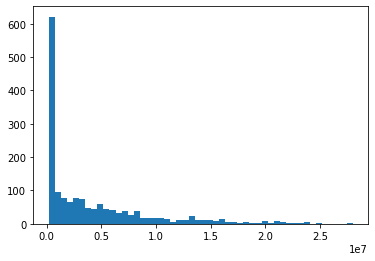

In [11]:
plt.hist((batting_data['salary']),bins=50)

In [12]:
X = batting_data.drop(['salary'], axis=1)  
y = (batting_data[['salary']])              
X.shape, y.shape

((1630, 24), (1630, 1))

In [13]:
y['rank']=KMeans(n_clusters=4, random_state=1).fit_predict(X = y)

<ipython-input-13-dbd398102410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['rank']=KMeans(n_clusters=4, random_state=1).fit_predict(X = y)


In [14]:
y = y.replace({'rank':2},4)
y = y.replace({'rank':1},2)
y = y.replace({'rank':4},1)

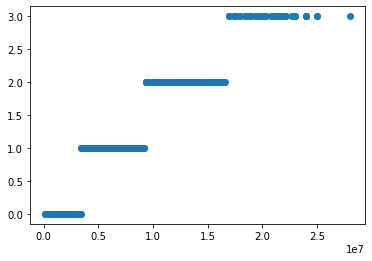

In [15]:
plt.scatter(y['salary'],y['rank'])

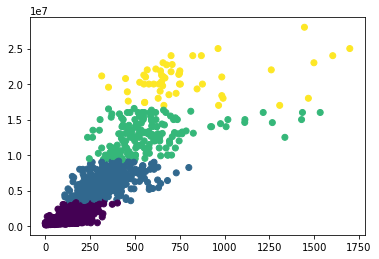

In [16]:
plt.scatter(batting_data['RBI'],batting_data['salary'],c=y['rank'])

<AxesSubplot:xlabel='rank', ylabel='count'>

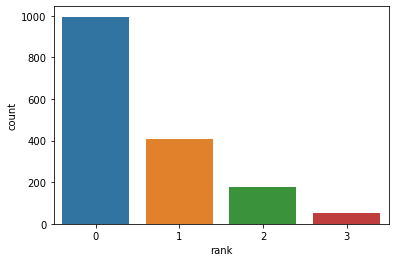

In [17]:
plt.xlabel('salary_rank')
sns.countplot(x = y['rank'])#.get_figure().savefig('count')

In [18]:
y = y['rank']

In [19]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4675    0
4676    0
4677    0
4678    0
4679    1
Name: rank, Length: 1630, dtype: int32

In [20]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))  
X_remove_variance = sel.fit_transform(X)
X_remove_variance.shape

(1630, 20)

+ #### Correlation matrix with Heatmap

In [21]:
sel.get_params()  #  threshold value

{'threshold': 0.21000000000000002}

In [22]:
sel.get_support()  # Get a mask, or integer index, of the features selected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False])

+ **The features been removed :**

In [23]:
X.columns[~sel.get_support()]

Index(['woba', 'slg', 'obp', 'avg'], dtype='object')

+ **The features remained :**

In [24]:
X.columns[sel.get_support()]   # The features remained

Index(['stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'age', 'rc'],
      dtype='object')

In [25]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=4)
kf = SelectKBest(score_func=f_classif, k=4)
km = SelectKBest(score_func=mutual_info_classif, k=4)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores', 
                         'mutual_info_scores'] 
featureScores

,Specs,chi2_Scores,f-test_Scores,mutual_info_scores
0,stint,1.285692e+03,481.485661,0.331305
1,G,3.127100e+05,1056.758439,0.519582
2,AB,1.335579e+06,1230.909987,0.577692
3,R,2.266019e+05,1293.786878,0.572982
4,H,4.053251e+05,1248.996123,0.574471
5,2B,8.478799e+04,1193.696454,0.571047
6,3B,7.172109e+03,197.991922,0.196148
7,HR,7.781293e+04,932.751461,0.491174
8,RBI,2.459516e+05,1279.302233,0.598665
9,SB,3.135166e+04,158.053590,0.149560


<Figure size 720x1440 with 0 Axes>

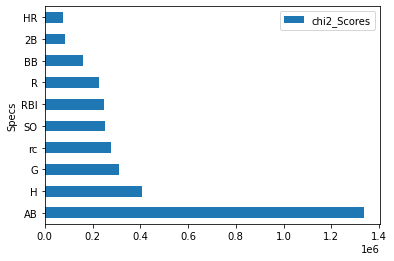

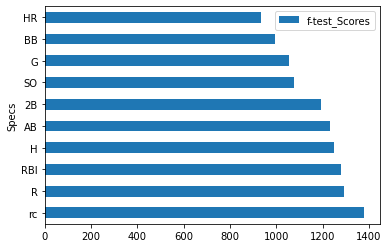

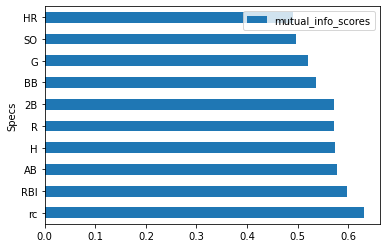

In [26]:
plt.figure(1, figsize=(10, 20))
for i in range(3):
    # plt.subplot(131+i)
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(10, fs)[['Specs', fs]]
    best_features.plot.barh('Specs');   # pands plot()

In [27]:
# 引入RFE套件 & estimator套件
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# estimator to be estimated (待估計的 estimator)
rfc = RandomForestClassifier(random_state=100, 
                             n_estimators=50)

# estimate model(估計模型)
rfe_model = RFE(rfc, 
                n_features_to_select = 5, # select 5 features (選取 5個必要的特徵變數)
                step = 1)  # remove one at a time (每次遞迴除掉 1個不必要的變數)

rfe = rfe_model.fit(X, y.astype('int')) # fit model(擬合模型) 
rfe.support_   # rfe.get_support() (回傳特徵變數是否必要)

array([False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [28]:
rfe.ranking_  # Selected (i.e., estimated best) features are assigned rank 1.

array([17,  3,  1,  1,  2,  1, 15,  4,  1,  7, 14,  8,  6, 10, 12, 20, 18,
       16, 19,  5, 13, 11,  1,  9])

In [29]:
X.columns[rfe.support_]   # X.columns[rfe.ranking_ == 1]

Index(['AB', 'R', '2B', 'RBI', 'rc'], dtype='object')

In [30]:
X[X.columns[rfe.ranking_ == 1]]

,AB,R,2B,RBI,rc
0,195,18,9,22,20.037736
1,733,102,36,89,101.282742
2,1243,173,66,174,188.534296
3,1718,232,88,234,249.456418
4,2305,302,114,309,326.005157
...,...,...,...,...,...
4675,150,26,8,25,32.431953
4676,644,99,34,73,96.621969
4677,1045,140,52,119,146.839333
4678,1304,167,61,157,179.915433


In [31]:
from sklearn.svm import LinearSVC  # Linear Support Vector Classification
from sklearn.feature_selection import SelectFromModel

# estimator to be estimated (待估計的 estimator)
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)

# estimate model(估計模型)
lsvc_model = SelectFromModel(lsvc,
                             max_features=5)# select 5 features (選取 5個必要的特徵變數)
X_lsvc = lsvc_model.fit_transform(X, y)# fit model(擬合模型)
X_lsvc.shape

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(1630, 5)

In [32]:
# Features whose importance is greater or equal to the threshold 
# are kept while the others are discarded.
lsvc_model.threshold_  # penalty="l1" : threshold = 0.00001 (1e-5)

1e-05

In [33]:
lsvc_model.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False])

In [34]:
X[X.columns[lsvc_model.get_support()]]

,2B,BB,IBB,age,rc
0,9,14,0,19,20.037736
1,36,75,12,20,101.282742
2,66,131,14,21,188.534296
3,88,159,15,22,249.456418
4,114,196,19,23,326.005157
...,...,...,...,...,...
4675,8,16,1,21,32.431953
4676,34,49,1,22,96.621969
4677,52,79,2,23,146.839333
4678,61,95,2,24,179.915433


DecisionTree > feature importances : 
 [0.00877448 0.02290218 0.00514513 0.00945349 0.00291116 0.01748937
 0.02235243 0.02600785 0.02698373 0.02546901 0.00866199 0.02631863
 0.04125685 0.0117493  0.01787449 0.01752958 0.01225783 0.00997178
 0.0229642  0.005192   0.02443579 0.00910411 0.6098008  0.0153938 ]


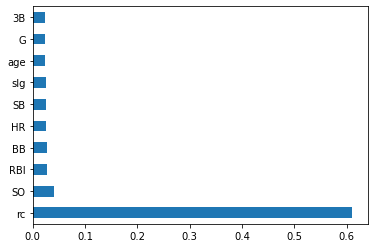

RandomForest > feature importances : 
 [0.02291825 0.06206335 0.05851979 0.06870661 0.09740392 0.08354695
 0.01683212 0.05788429 0.08509367 0.02066767 0.01560543 0.03112117
 0.04077425 0.02405936 0.01903528 0.01488663 0.02284836 0.01656788
 0.01339598 0.02322735 0.02048259 0.01833283 0.14713403 0.01889224]


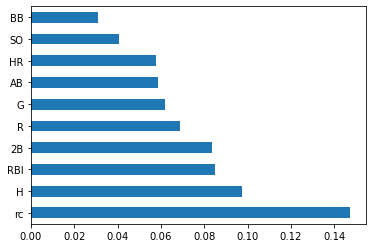

ExtraTrees > feature importances : 
 [0.03012684 0.04380951 0.06420787 0.06775348 0.06993356 0.06156814
 0.01908775 0.05145215 0.06833167 0.02179167 0.02604954 0.07173749
 0.05470297 0.0276652  0.0264269  0.01875704 0.03888495 0.0447654
 0.02611139 0.02249637 0.02303631 0.01790333 0.08398463 0.01941582]


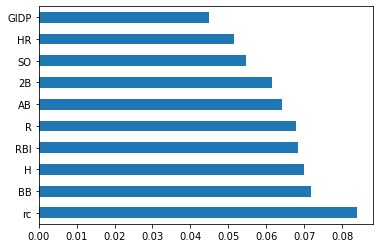

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

model = [DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]  

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 10]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n', 
          model[i].feature_importances_) 
    feat_importances = pd.Series(model[i].feature_importances_, 
                                 index=X.columns)
    feat_importances.nlargest(10).plot.barh()#.get_figure().savefig('importance{}'.format(i))
    # plt.xlim(0, 0.7)
    plt.show()

In [36]:
X.columns

Index(['stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'age', 'woba', 'slg', 'obp',
       'rc', 'avg'],
      dtype='object')

In [37]:
X_features = X
X_features

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,...,HBP,SH,SF,GIDP,age,woba,slg,obp,rc,avg
0,1,77,195,18,42,9,0,7,22,3,...,3,2,0,4,19,0.292594,0.369231,0.278302,20.037736,0.215385
1,2,229,733,102,190,36,5,22,89,21,...,9,6,5,8,20,0.327301,0.412005,0.333333,101.282742,0.259209
2,3,367,1243,173,338,66,7,42,174,33,...,11,9,9,21,21,0.344116,0.437651,0.344333,188.534296,0.271923
3,4,493,1718,232,464,88,11,55,234,46,...,16,11,14,30,22,0.336855,0.430151,0.335081,249.456418,0.270081
4,5,652,2305,302,615,114,16,76,309,53,...,20,12,20,47,23,0.332566,0.429067,0.327037,326.005157,0.266811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,1,43,150,26,44,8,4,9,25,7,...,3,2,0,0,21,0.415161,0.580000,0.372781,32.431953,0.293333
4676,2,168,644,99,179,34,7,20,73,20,...,8,4,2,9,22,0.344991,0.445652,0.335704,96.621969,0.277950
4677,3,275,1045,140,281,52,10,31,119,29,...,15,5,5,17,23,0.333910,0.426794,0.327797,146.839333,0.268900
4678,4,345,1304,167,345,61,10,43,157,29,...,20,5,7,17,24,0.331910,0.425613,0.322581,179.915433,0.264571


In [38]:
# z-score Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features)#np.array

In [39]:
# Split the dataset with 85% for training data
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(Xn, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

model = [LogisticRegression(random_state=1),
         DecisionTreeClassifier(random_state=1), 
         RandomForestClassifier(n_estimators=100, random_state=1),
         ExtraTreesClassifier(n_estimators=300, random_state=1),
         AdaBoostClassifier(n_estimators=10, random_state=1),
         GradientBoostingClassifier(n_estimators=300, random_state=1),
         XGBClassifier(n_estimators=300, random_state=1)]

model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]

num_chr = [8, 8, 12, 10, 8, 8, 8]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i]) 

Logistic: 	 0.8693877551020408
Decision: 	 0.8204081632653061
RandomForest: 	 0.8653061224489796
ExtraTrees: 	 0.8653061224489796
AdaBoost: 	 0.8326530612244898
Gradient: 	 0.8571428571428571
XGBClass: 	 0.8653061224489796


In [42]:
# voting
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = ExtraTreesClassifier()
clf3 = RandomForestClassifier()

vote = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]).fit(X1, y1)
vote.score(X2,y2)

0.8693877551020408

In [43]:
# stacking 
from sklearn.ensemble import StackingClassifier

clf1 = GradientBoostingClassifier()
clf2 = ExtraTreesClassifier()
clf3 = RandomForestClassifier()

clf = StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]).fit(X1, y1)
clf.score(X2,y2)

0.8775510204081632

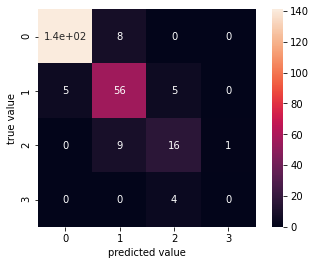

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, vote.predict(X2))
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

Logistic: 	 0.8693877551020408
Decision: 	 0.8204081632653061
RandomForest: 	 0.8653061224489796
ExtraTrees: 	 0.8653061224489796
AdaBoost: 	 0.8326530612244898
Gradient: 	 0.8571428571428571
XGBClass: 	 0.8653061224489796


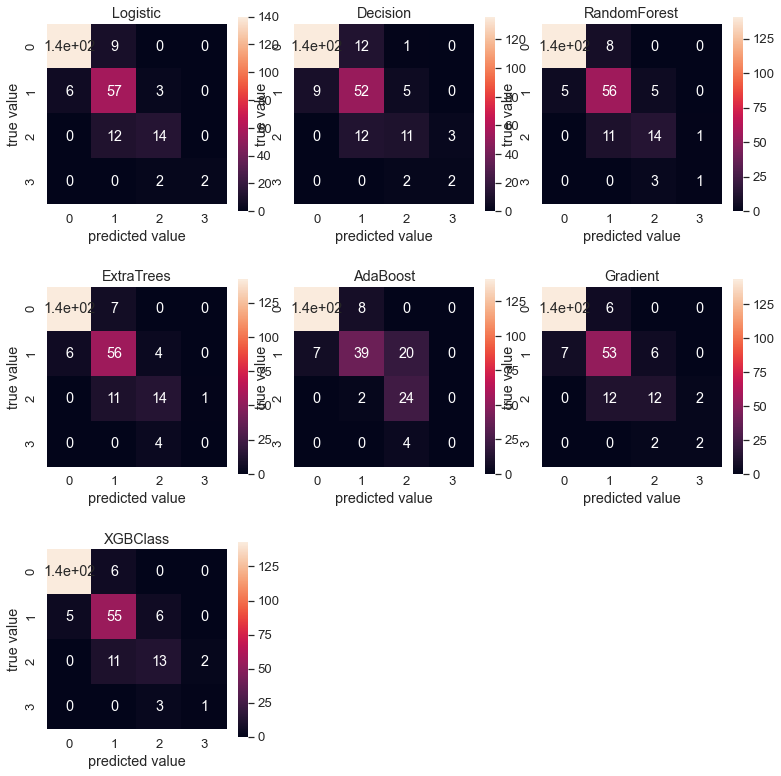

In [45]:
n_clf = len(model)
clfs = [str(model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(y2, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.1)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');